# Hamming weight and Pearson Correlation

This notebook demonstrates how to guess a floating number using Hamming Weight model.

We generate a random secret floating number. Then we use hamming weight model to guess the number.

In [1]:
import pathlib
TEST_RESULT_DIR = './results'

pathlib.Path(TEST_RESULT_DIR).mkdir(parents=True, exist_ok=True) 

In [2]:
import numpy as np

mantissa_nbits = 10
guess_range=(-5.0, 5.0)
# the number of guess values in the guess range
secret_number = np.random.uniform(guess_range[0], guess_range[1]) 
secret_number = -0.493029799853
print('secret_number =', secret_number)

secret_number = -0.493029799853


## Receover the weight number in step-by-step

In [3]:
import sys
sys.path.append("../")

from pybatina.weight_recovery import *
from pybatina.utils import *

### Correlation of mantissa

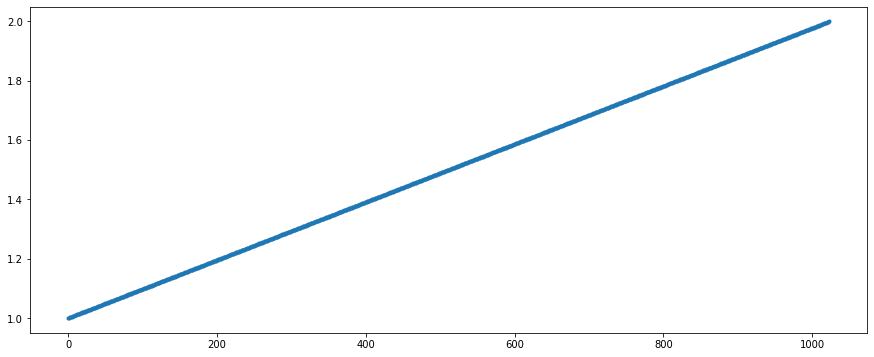

In [4]:
guess_numbers = build_guess_values(component='mantissa', mantissa_nbits=mantissa_nbits, guess_range=guess_range)
known_inputs = build_input_values(mantissa_nbits=mantissa_nbits, component='mantissa')
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
pd.Series(guess_numbers).sort_values().reset_index(drop=True).plot(figsize=(15,6), marker='.')

In [5]:
%%time
mantisa_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

CPU times: user 1.52 s, sys: 31.6 ms, total: 1.55 s
Wall time: 1.55 s


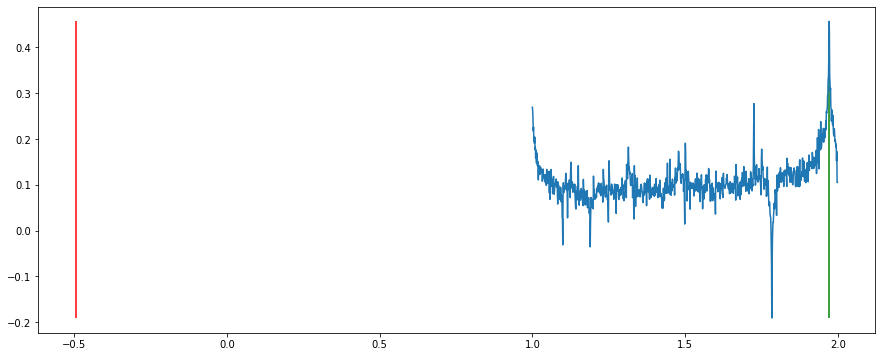

In [6]:
ax = mantisa_corr.sort_index().plot(figsize=(15,6))
ax.vlines(mantisa_corr.idxmax(), mantisa_corr.min(), mantisa_corr.max(), color='green')
ax.vlines(secret_number, mantisa_corr.min(), mantisa_corr.max(), color='red')

In [7]:
mantisa_corr.sort_values(ascending=False).iloc[:10]

1.971680    0.456292
1.972656    0.437597
1.970703    0.371210
1.973633    0.343866
1.969727    0.335392
1.968750    0.330295
1.974609    0.326517
1.976562    0.310845
1.975586    0.304525
1.967773    0.298574
dtype: float64

### Correlation exponent

../pybatina/weight_recovery.py:40: RuntimeWarning: invalid value encountered in greater_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
../pybatina/weight_recovery.py:40: RuntimeWarning: invalid value encountered in less_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]


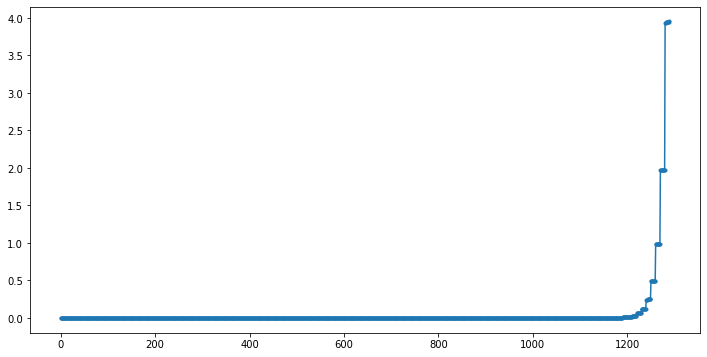

In [8]:
known_inputs = build_input_values(component='exponent')
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
guess_numbers = build_guess_values(component='exponent', numbers=mantisa_corr.sort_values(ascending=False).index[:10], guess_range=guess_range)
pd.Series(guess_numbers).sort_values().reset_index(drop=True).plot(figsize=(12,6), marker='.')

In [9]:
%%time
mantisa_exp_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

CPU times: user 390 ms, sys: 168 µs, total: 391 ms
Wall time: 389 ms


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)


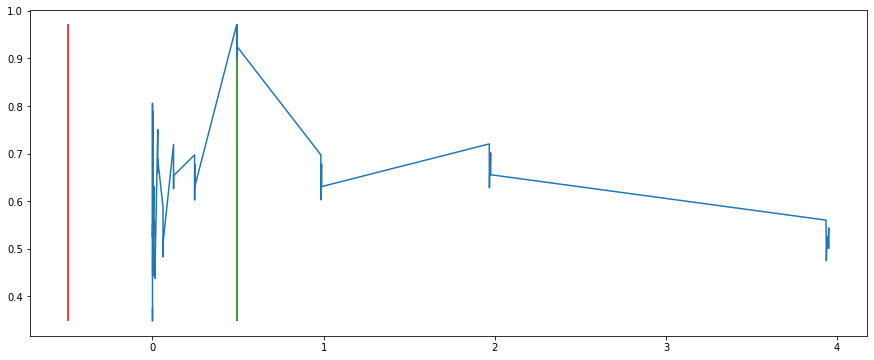

In [10]:
ax = mantisa_exp_corr.sort_index().plot(figsize=(15,6))
ax.vlines(mantisa_exp_corr.idxmax(), mantisa_exp_corr.min(), mantisa_exp_corr.max(), color='green')
ax.vlines(secret_number, mantisa_exp_corr.min(), mantisa_exp_corr.max(), color='red')

In [11]:
mantisa_exp_corr.sort_values(ascending=False).iloc[:10]

0.491943    0.970755
0.493896    0.958409
0.493652    0.942982
0.492920    0.942982
0.493408    0.942982
0.493164    0.924189
0.492676    0.924189
0.492432    0.924189
0.494141    0.924189
0.492188    0.901797
dtype: float64

### Correlation sign

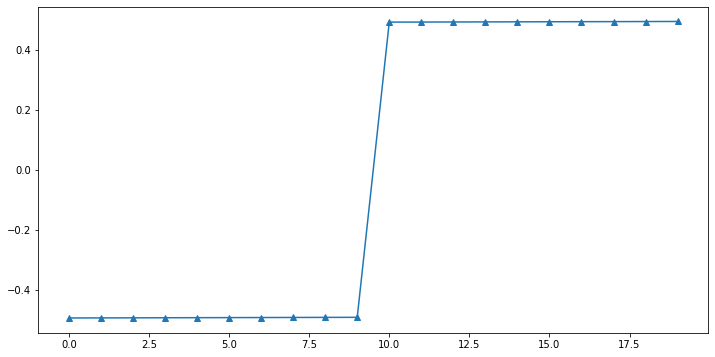

In [12]:
guess_numbers = build_guess_values(component='sign', numbers=mantisa_exp_corr.sort_values(ascending=False).index[:10], guess_range=guess_range)
known_inputs = build_input_values(component='sign')
secret_hw = np.vectorize(hamming_weight)(known_inputs * secret_number)
pd.Series(guess_numbers).sort_values().reset_index(drop=True).plot(figsize=(12,6), marker='^')

In [13]:
%%time
full_number_corr = compute_corr_numbers(secret_hw, known_inputs, guess_numbers)

CPU times: user 12.1 ms, sys: 6 µs, total: 12.1 ms
Wall time: 11.6 ms


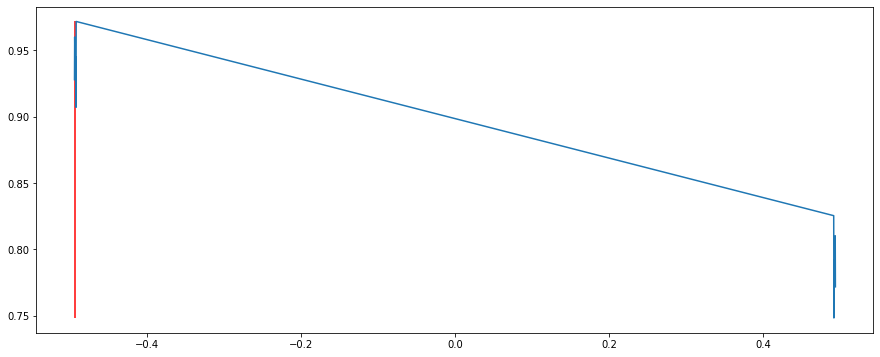

In [14]:
ax = full_number_corr.sort_index().plot(figsize=(15,6))
ax.vlines(secret_number, full_number_corr.min(), full_number_corr.max(), color='red')

In [15]:
full_number_corr.sort_values(ascending=False).iloc[:10]

-0.491943    0.971726
-0.493896    0.960001
-0.493408    0.945457
-0.492920    0.945457
-0.493652    0.945457
-0.494141    0.927862
-0.492432    0.927862
-0.492676    0.927862
-0.493164    0.927862
-0.492188    0.907030
dtype: float64

## Recover a secret number with helper function

../pybatina/weight_recovery.py:40: RuntimeWarning: invalid value encountered in greater_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
../pybatina/weight_recovery.py:40: RuntimeWarning: invalid value encountered in less_equal
  guess_numbers = y[(lo_range <= y) & (y <= hi_range)]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2167: RuntimeWarning: overflow encountered in ? (vectorized)
  outputs = ufunc(*inputs)


CPU times: user 2.05 s, sys: 40.2 ms, total: 2.09 s
Wall time: 2.09 s


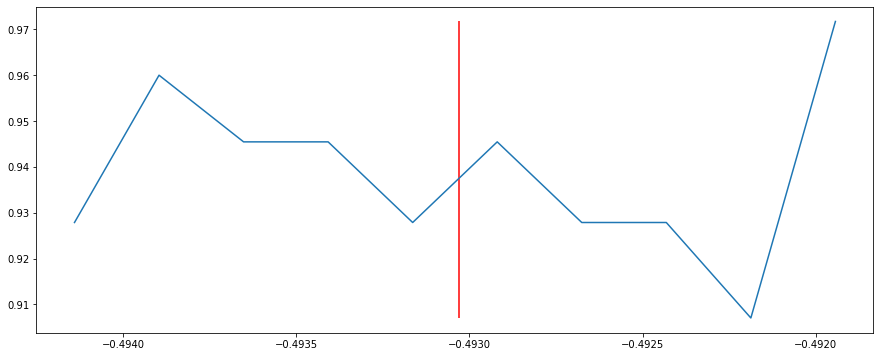

In [19]:
%%time
from weight_recovery_helper import *
full_number_corr = batina_recover_weight(secret_number=secret_number, 
                                         guess_range=guess_range,
                                         mantissa_nbits=mantissa_nbits,
                                         noise=None)
ax = full_number_corr.sort_index().plot(figsize=(15,6))
ax.vlines(secret_number, full_number_corr.min(), full_number_corr.max(), color='red')

In [17]:
full_number_corr.sort_values(ascending=False).iloc[:10]

-0.491943    0.971726
-0.493896    0.960001
-0.493652    0.945457
-0.492920    0.945457
-0.493408    0.945457
-0.493164    0.927862
-0.492676    0.927862
-0.492432    0.927862
-0.494141    0.927862
-0.492188    0.907030
dtype: float64

## Recover multiple secret numbers

In [18]:
SECRET_VALUE='secret value'
GUESSED_VALUE = 'guessed value'
CORRELATION='correlation'
df_index = [SECRET_VALUE, GUESSED_VALUE, CORRELATION]

In [ ]:
def add_noise_to_signal(signal, snr, freq):
    """
    add noise to the signal
    :param signal: signal
    :param snr: signal to noise ratio 
    :param freq: frequency of noise 
    :return: signal with noise
    """
    sig_max = signal.max()
    sig_min = signal.min()
    return pd.Series(signal).apply(lambda x: x  +
                                   np.average(np.random.normal(0.0, (sig_max-sig_min)/snr, freq)))

In [ ]:
guess_range = (-5.0, 5.0)
precision = 1e-3
n_secret_numbers = 100
secret_numbers = np.concatenate((
    np.random.uniform(guess_range[0], guess_range[1], int(n_secret_numbers*2/4) ),
    np.random.uniform(guess_range[0]*3e-1, guess_range[1]*3e-1, int(n_secret_numbers*1/4)),
    np.random.uniform(guess_range[0]*1e-1, guess_range[1]*1e-1, int(n_secret_numbers*1/4))
))
np.random.shuffle(secret_numbers)
signal_to_noise_ratio = 0.5
print('secret_numbers.shape = %s' % (str(secret_numbers.shape)))

## Batina

In [ ]:
%%time
# start guessing... - without noise
batina_results = pd.DataFrame(dtype=np.float32, columns=df_index)
for value in secret_numbers:
    s = batina_recover_weight(secret_number=value,
                              guess_range=guess_range,
                              mantissa_nbits=mantissa_nbits)
    s.name = CORRELATION
    df = pd.DataFrame(s).reset_index().rename(columns={'index': GUESSED_VALUE})
    df[SECRET_VALUE] = value
    batina_results = pd.concat([batina_results, df], axis=0, ignore_index=True)

In [ ]:
from datetime import datetime
from os import path

fname = path.join(TEST_RESULT_DIR, 
                  'batina_results-%s.csv' % (datetime.now().strftime("%Y%m%d_%H%M%S")))
batina_results.to_csv(fname)
print('save results in %s' % fname)

In [ ]:
%%time
# start guessing... - without noise
noise_batina_results = pd.DataFrame(dtype=np.float32, columns=df_index)
for value in secret_numbers:
    s = batina_recover_weight(secret_number=value, 
                              guess_range=guess_range,
                              mantissa_nbits=mantissa_nbits,
                              noise=(add_noise_to_signal, signal_to_noise_ratio, 200))
    s.name = CORRELATION
    df = pd.DataFrame(s).reset_index().rename(columns={'index': GUESSED_VALUE})
    df[SECRET_VALUE] = value
    noise_batina_results = pd.concat([noise_batina_results, df], axis=0, ignore_index=True)

In [ ]:
from datetime import datetime
from os import path

fname = path.join(TEST_RESULT_DIR, 
                  'noise_batina_results-%s.csv' % (datetime.now().strftime("%Y%m%d_%H%M%S")))
noise_batina_results.to_csv(fname)
print('save results in %s' % fname)

### Statistics

In [ ]:
ERROR = 'error'
def statistics(df):
    dft = df[[SECRET_VALUE, GUESSED_VALUE, CORRELATION]].astype(dtype=np.float64)
    dft[ERROR] = np.abs((dft[GUESSED_VALUE] - dft[SECRET_VALUE])/dft[SECRET_VALUE])    
    best_corr = dft.loc[dft.groupby(SECRET_VALUE)[CORRELATION].idxmax()]
    best_err = dft.loc[dft.groupby(SECRET_VALUE)[ERROR].idxmin()]
    return best_corr.T, best_err.T

In [ ]:
batina_best_corr, batina_best_err = statistics(batina_results)
noise_batina_best_corr, noise_batina_best_err = statistics(noise_batina_results)

In [ ]:
study_score = batina_best_corr
(study_score.T[ERROR] < 1e-3).value_counts()

In [ ]:
study_score.T.sort_values(ERROR, ascending=False)[:10]

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
df = batina_best_corr.T
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='without noise')
ax[0].set_ylabel('Guessed values')
ax[0].set_title('Guessed values (Batina, best corr)')

df = batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='without noise')
ax[1].set_ylabel('Error')
ax[1].set_title('Guess Error (Batina, best corr)')

df = batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='without noise')
ax[2].set_ylabel('Correlation')
ax[2].set_title('Correlation (Batina, best corr)')

for a in ax:
    a.legend()
    a.grid(True)
    a.set_xlabel('secret values')

from datetime import datetime
from os import path

fname = path.join(TEST_RESULT_DIR, 
                  'hw-%s.jpg' % (datetime.now().strftime("%Y%m%d_%H%M%S%f")))
plt.savefig(fname)
plt.show()

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
df = batina_best_corr.T
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='without noise')
df = noise_batina_best_corr.T
df[[GUESSED_VALUE, SECRET_VALUE]].set_index(SECRET_VALUE)[GUESSED_VALUE].plot(ax=ax[0], marker='.', label='with noise')
ax[0].set_ylabel('Guessed values')
ax[0].set_title('Guessed values (Batina, best corr, SNR=%0.2f)' % signal_to_noise_ratio)

df = batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='without noise')
df = noise_batina_best_corr.T
df[[ERROR, SECRET_VALUE]].set_index(SECRET_VALUE)[ERROR].plot(ax=ax[1], marker='.', label='with noise')
ax[1].set_ylabel('Error')
ax[1].set_title('Guess Error (Batina, best corr, SNR=%0.2f)' % signal_to_noise_ratio)

df = batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='without noise')
df = noise_batina_best_corr.T
df[[CORRELATION, SECRET_VALUE]].set_index(SECRET_VALUE)[CORRELATION].plot(ax=ax[2], marker='.', label='with noise')
ax[2].set_ylabel('Correlation')
ax[2].set_title('Correlation (Batina, best corr, SNR=%0.2f)' % signal_to_noise_ratio)

for a in ax:
    a.legend()
    a.grid(True)
    a.set_xlabel('secret values')

from datetime import datetime
from os import path

fname = path.join(TEST_RESULT_DIR, 
                  'nhw-%s.jpg' % (datetime.now().strftime("%Y%m%d_%H%M%S%f")))
plt.savefig(fname)
plt.show()